# EDA

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import folium
import folium.plugins
import io
from matplotlib import animation,rc
import base64


In [5]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

c:\users\rivza\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df.head(100)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,197002280001,1970,2,28,NaN,0,NaN,102,Jordan,10,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
96,197003000001,1970,3,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
97,197003010001,1970,3,1,NaN,0,NaN,98,Italy,8,...,NaN,NaN,NaN,NaN,PGIS,1,0,1,1,NaN
98,197003010005,1970,3,1,NaN,0,NaN,217,United States,1,...,The perpetrators painted signs on nearby the b...,Committee on Government Operations United Stat...,"""Colorado R.O.T.C. Blast Attributed to Arsonis...","Robert W. Patterson, ""Crime & the American Res...",Hewitt Project,-9,-9,0,-9,NaN


In [11]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [15]:
df.count(axis=1)

0         45
1         52
2         47
3         47
4         45
          ..
181686    64
181687    67
181688    62
181689    59
181690    57
Length: 181691, dtype: int64

In [16]:
df.count(axis=0)

eventid       181691
iyear         181691
imonth        181691
iday          181691
approxdate      9239
               ...  
INT_LOG       181691
INT_IDEO      181691
INT_MISC      181691
INT_ANY       181691
related        25038
Length: 135, dtype: int64

In [19]:
df_new = df.dropna(thresh = 150000, axis = 1)

In [27]:
df_new

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,Unknown Gun Type,1.0,2.0,-9,0.0,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,"Projectile (rockets, mortars, RPGs, etc.)",2.0,7.0,1,0.0,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,Arson/Fire,0.0,0.0,1,0.0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,Grenade,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9


In [29]:
df_new.type()

AttributeError: 'DataFrame' object has no attribute 'type'

In [30]:
data_new.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
specificity             6
vicinity                0
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
target1               636
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
weaptype1               0
weaptype1_txt           0
weapsubtype1        20768
weapsubtype1_txt    20768
nkill       

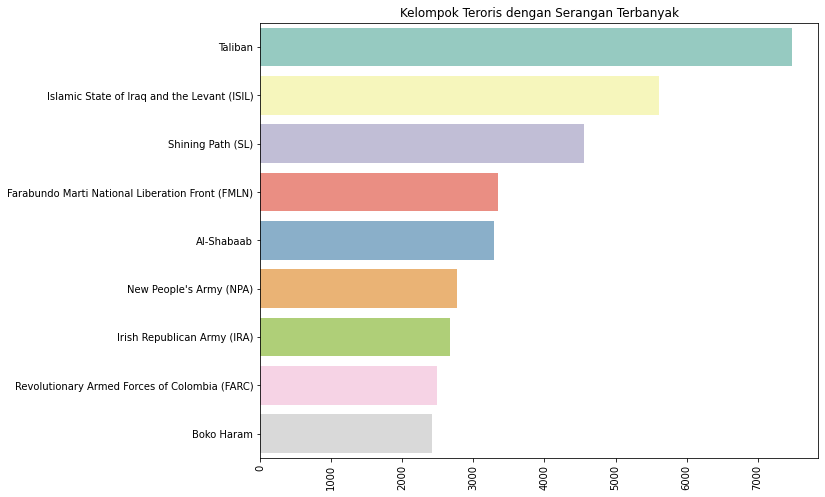

In [41]:
sns.barplot(data_new['gname'].value_counts()[1:10].values,data_new['gname'].value_counts()[1:10].index,palette='Set3')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Kelompok Teroris dengan Serangan Terbanyak')
plt.show()

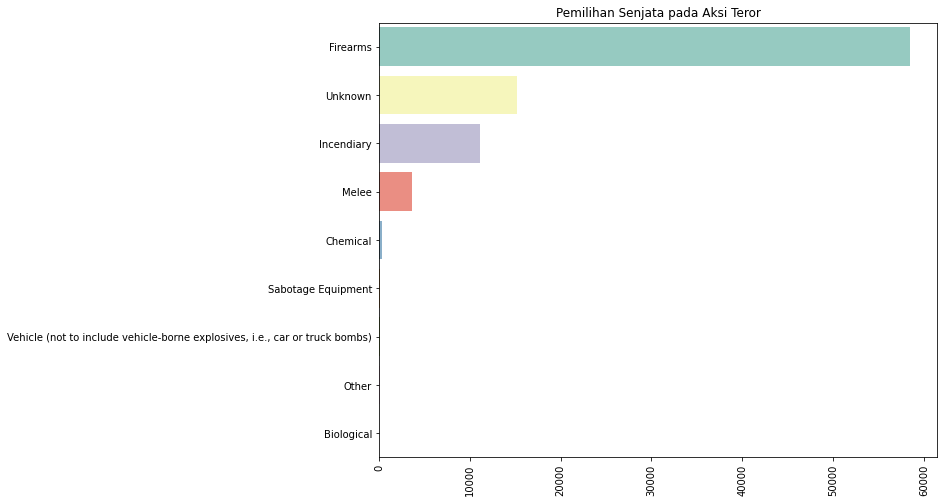

In [40]:
sns.barplot(data_new['weaptype1_txt'].value_counts()[1:10].values,data_new['weaptype1_txt'].value_counts()[1:10].index,palette='Set3')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title("Pemilihan Senjata pada Aksi Teror")
plt.show()